# Gradient Boosting Regressor on Gapminder Dataset

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
data=pd.read_csv('gapminder.csv')
data.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [2]:
X=data.drop('fertility',axis=1)
y=data['fertility']

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   HIV              139 non-null    float64
 2   CO2              139 non-null    float64
 3   BMI_male         139 non-null    float64
 4   GDP              139 non-null    float64
 5   BMI_female       139 non-null    float64
 6   life             139 non-null    float64
 7   child_mortality  139 non-null    float64
 8   Region           139 non-null    object 
dtypes: float64(8), object(1)
memory usage: 9.9+ KB


In [4]:
X=pd.get_dummies(data,drop_first=True)

In [5]:
X.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=41)

In [7]:
from sklearn.preprocessing import MinMaxScaler
data_scaled=MinMaxScaler()
x_train=data_scaled.fit_transform(X_train)
x_test=data_scaled.transform(X_test)

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

In [9]:
model=GradientBoostingRegressor(learning_rate=0.6,min_samples_leaf=2,n_estimators=70)

In [10]:
model.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.6, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=70,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
model.score(x_test,y_test)

0.9943886982225059

In [14]:
y_pred=model.predict(x_test)
y_pred

array([1.34953468, 2.36891506, 5.09164898, 1.3745589 , 2.95225108,
       2.45764257, 1.53269683, 5.1592352 , 3.4439218 , 2.39286191,
       5.83331448, 2.14399564, 2.30795835, 2.42819208, 2.44511078,
       4.97530347, 2.5911055 , 3.53200132, 2.7909988 , 1.43840298,
       3.55349006, 5.28802978, 1.5173146 , 1.39087862, 5.3467582 ,
       1.40462051, 1.54451036, 5.34022374, 1.92425435, 2.02648336,
       5.03775831, 2.80154551, 5.41161633, 2.33842535, 4.9898315 ])

In [13]:
model.score(x_train,y_train)

0.9999999639846445

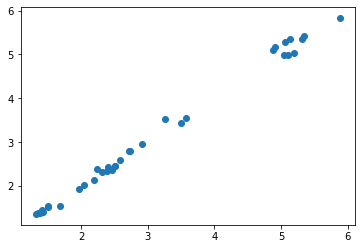

In [17]:
plt.scatter(y_test,y_pred)
plt.show()

# Gradient Boosting Classifier on IRIS Dataset

In [83]:
iris=pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [84]:
X=iris.drop('Species',axis=1)
y=iris['Species']

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=21,stratify=y,test_size=0.33)

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=50)

In [105]:
model.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [106]:
model.score(X_test,y_test)

1.0

In [107]:
model.score(X_train,y_train)

1.0

In [18]:
y_pred=model.predict(X_test)
y_pred

array([7.37195932, 7.37195932, 7.37198594, 7.37195932, 7.37195932,
       7.37195932, 7.3799353 , 7.38401555, 7.37198594, 7.3799353 ,
       7.37143688, 7.3722104 , 7.3799353 , 7.3799353 , 7.37182399,
       7.3799353 , 7.37952723, 7.41038174, 7.37195932, 7.37195932,
       7.37182399, 7.37843754, 7.37195932, 7.3799353 , 7.3799353 ,
       7.37195932, 7.37195932, 7.37841084, 7.37952723, 7.3722104 ,
       7.37143688, 7.41013066, 7.39008787, 7.3799353 , 7.36371198])

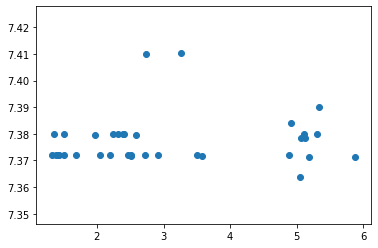

In [19]:
plt.scatter(y_test,y_pred)
plt.show()